# TP1 du module 3 : les librairies Python pour le ML

Dans ce TP, nous allons explorer les quatre librairies présentées dans le cours. Objectifs :
* Savoir créer et récupérer des données avec Numpy et Pandas
* Savoir interroger les données avec Pandas
* Savoir calculer des statistiques de base
* Produire des visualisations avec Matplotlib et Seaborn

In [3]:
# Insérer ici l'import des librairies dont vous avez besoin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Première partie : s'échauffer avec Numpy
Commencons avec quelques exercices sur Numpy, qui vous permettront également de réviser certaines fonctionnalités de Python. Pour rappel, toute la documentation Numpy est disponible en cliquant sur ce [lien](https://numpy.org/doc/stable/user/index.html)

**Question 1 :** créer une matrice `mat` 3*3 contenant tous les chiffres de 1 à 9, à l'aide des méthodes `arange` et `reshape`.

In [35]:
mat = np.arange(1, 10).reshape(3, 3)
print(mat)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


**Question 2 :** écrire une fonction prenant en paramètre une matrice carré (de taille n*n, où n est un entier), et qui renvoie sa trace (la somme des nombres sur la diagonale de la matrice), sans utiliser la méthode `trace` de numpy. Appliquez votre fonction à la matrice `mat` créée à la question précédente, et comparez le résultat avec la méthode `trace` de numpy pour valider votre fonction.

In [36]:
# Fonction pour calculer la trace
def ma_trace(mat):
    n = mat.shape[0]  # taille de la matrice (nombre de lignes)
    somme = 0
    for i in range(n):
        somme += mat[i, i]  # on additionne les éléments diagonaux
    return somme

# Application de la fonction
trace_ma_fonction = ma_trace(mat)
print("Trace calculée manuellement :", trace_ma_fonction)

# Comparaison avec numpy
trace_numpy = np.trace(mat)
print("Trace avec numpy.trace :", trace_numpy)

Trace calculée manuellement : 15
Trace avec numpy.trace : 15


**Question 3 :** créez une deuxième matrice `mat2`, de dimension 3*3 également, qui ne contient que des 1.

In [37]:
mat2 = np.ones((3, 3))
mat2

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

**Question 4 :** créez la matrice `vert`, qui consiste à empiler verticalement `mat` sur `mat2`. Résultat attendu :

|   |   |   |
|---|---|---|
| 1 | 2 | 3 |
| 4 | 5 | 6 |
| 7 | 8 | 9 |
| 1 | 1 | 1 |
| 1 | 1 | 1 |
| 1 | 1 | 1 |

In [39]:
mat_vert=np.vstack((mat, mat2))
mat_vert

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

**Question 5 :** créez la matrice `hori`, qui consiste à coller horizontalement `mat` à `mat2`. Résultat attendu :

|   |   |   |   |   |   |
|---|---|---|---|---|---|
| 1 | 2 | 3 | 1 | 1 | 1 |
| 4 | 5 | 6 | 1 | 1 | 1 |
| 7 | 8 | 9 | 1 | 1 | 1 |

In [45]:
mat_hori = np.hstack((mat,mat2))
mat_hori

array([[1., 2., 3., 1., 1., 1.],
       [4., 5., 6., 1., 1., 1.],
       [7., 8., 9., 1., 1., 1.]])

**Question 5 :** écrire une fonction qui prend en paramètre une matrice et un nombre, et qui renvoie le nombre d'éléments de la matrice qui sont strictement inférieurs à ce nombre. Vous pouvez utiliser la méthode `count_nonzero` de numpy.

In [48]:
def elements_under(mat,nbr):
    return np.count_nonzero(mat < nbr)

elements_under(mat_vert,3)

np.int64(11)

## Partie 2 : manipuler un jeu de données
Après cet échauffement, nous allons passer à la manipulation d'un jeu de données, pour en commencer l'analyse, et pour produire des visualisations.

### Présentation du jeu de données
Pour ce TP (et les suivants), nous allons analyser les données d'un jeu de données sur les passagers du Titanic. Pour rappel, le RMS Titanic est un paquebot transatlantique britannique qui fait naufrage dans l'océan Atlantique Nord en 1912 à la suite d'une collision avec un iceberg, lors de son voyage inaugural de Southampton à New York. Entre 1 490 et 1 520 personnes trouvent la mort, ce qui fait de cet événement l'une des plus grandes catastrophes maritimes survenues en temps de paix et la plus grande pour l'époque. 

![Le Titanic à Southampton le 10 avril 1912. ](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/420px-RMS_Titanic_3.jpg)

Ce jeu de données est assez utilisé pour débuter dans le machine learning. Nous irons plus loin sur le prochain TP (module 4) dans son analyse, sur cette partie l'objectif est simplement de prendre en main Pandas, Matplotlib et Seaborn.

Les données contiennent un ensemble d'information sur ces passages (genre, age, etc), ainsi qu'un atribut sépcifiant s'ils ont ou non survécu au naufrage. Pour vous aider, voilà un bref descriptifs des attributs du jeu de données : 

| Attribut     | Explication            | 
| -------------          |:-------------:  | 
| Survived | 0 = Décédé, 1 = Survivant| 
| PClass             | 1 = cabine 1ere classe, 2= cabine 2e classe, 3=cabine 3e classe         |  
| Sex | 0=femme, 1=homme |
| sibsp | Nombre de frères, soeurs, et/ou conjoint à bord |
|parch | Nombre de parents et/ou enfants à bord |
| ticket | Numéro du ticket |
|cabin | Numéro de cabine |
|embarked | Port d'embarquement (C = Cherbourg; Q = Queenstown; S = Southampton) |

### Pandas
Dans cette partie, chaque question ne nécessite qu'une seule ligne de code. 

**Question 1 :** charger le jeu de données dans un Dataframe depuis l'adresse suivante : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [4]:
url= "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic=pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Question 2 :** combien de lignes comporte ce dataset ? Combien de colonnes ? Contient-il des valeurs nulles dans certaines colonnes ?

In [19]:
titanic.info() #891 / 12 / oui

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


**Question 3 :** calculez les statistiques de base sur les colonnes numériques ce jeu de données

In [20]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


**Question 4 :** sélectionnez uniquement les colonnes `Survived` et `Age`

In [22]:
sous_ensemble_titanic = titanic[['Survived','Age']]
sous_ensemble_titanic


,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,NaN
889,1,26.0


**Question 5 :** sélectionner les informations sur le passager ayant occupé la cabine B78. Résultat attendu : 

|    | PassengerId | Survived | Pclass |                                           Name |    Sex | Age | SibSp | Parch |   Ticket |     Fare | Cabin | Embarked |
|---:|------------:|---------:|-------:|-----------------------------------------------:|-------:|----:|------:|------:|---------:|---------:|------:|---------:|
| 31 | 32          | 1        | 1      | Spencer, Mrs. William Augustus (Marie Eugenie) | female | NaN | 1     | 0     | PC 17569 | 146.5208 | B78   | C        |

In [66]:
passenger_B78= titanic[titanic['Cabin']=='B78']
passenger_B78

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


**Question 6 :** Sélectionnez uniquement les passagers âgés de plus de 30 ans (strictement), qui sont des femmes, qui voyageaient en première classe, et qui n'ont pas survécu.

Résultat attendu :

|     | PassengerId | Survived | Pclass |                       Name |    Sex |  Age | SibSp | Parch |   Ticket |    Fare | Cabin | Embarked |
|----:|------------:|---------:|-------:|---------------------------:|-------:|-----:|------:|------:|---------:|--------:|------:|---------:|
| 177 | 178         | 0        | 1      | Isham, Miss. Ann Elizabeth | female | 50.0 | 0     | 0     | PC 17595 | 28.7125 | C49   | C        |

In [72]:
# Masque combiné
mask = (titanic['Age'] > 30.0) & \
       (titanic['Sex'] == 'female') & \
       (titanic['Pclass'] == 1) & \
       (titanic['Survived'] == 0)

# Application du masque
passenger_over_30 = titanic[mask]

passenger_over_30

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C


**Question 7 :** trouver le nom des passagers qui sont montés à Cherbourg ou à Queenstown, qui voyageaient en 1e classe, avec au moins deux frère/soeurs/conjoints? Résultat attendu :

|     | PassengerId | Survived | Pclass |                                  Name |    Sex |  Age | SibSp | Parch |   Ticket |    Fare |           Cabin | Embarked |
|----:|------------:|---------:|-------:|--------------------------------------:|-------:|-----:|------:|------:|---------:|--------:|----------------:|---------:|
| 245 | 246         | 0        | 1      | Minahan, Dr. William Edward           | male   | 44.0 | 2     | 0     | 19928    | 90.000  | C78             | Q        |
| 311 | 312         | 1        | 1      | Ryerson, Miss. Emily Borie            | female | 18.0 | 2     | 2     | PC 17608 | 262.375 | B57 B59 B63 B66 | C        |
| 742 | 743         | 1        | 1      | Ryerson, Miss. Susan Parker "Suzette" | female | 21.0 | 2     | 2     | PC 17608 | 262.375 | B57 B59 B63 B66 | C        |

In [74]:
# Masque combiné
mask2 = (titanic['Embarked'].isin(['C','Q'])) & \
       (titanic['Pclass'] == 1) & \
       (titanic['SibSp'] >= 2)

# Application du masque
passenger_with_siblings = titanic[mask2]
passenger_with_siblings



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.000,C78,Q
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


**Question 8 :** compter le nombre de femmes et d'hommes ayant survécu. (rappel : en une seule ligne de code !). Résultat attendu :

|          Sex |     |
|-------------:|----:|
|    female    | 233 |
|     male     | 109 |
| dtype: int64 |     |

In [81]:
titanic_survivor = titanic[titanic['Survived'] == 1]['Sex'].value_counts()
titanic_survivor


Sex
female    233
male      109
Name: count, dtype: int64

**Question 9** : pour chaque classe, calculer la moyenne d'âge. Résultat attendu :

|           Pclass          |           |
|:-------------------------:|----------:|
|             1             | 38.233441 |
|             2             | 29.877630 |
|             3             | 25.140620 |
| Name: Age, dtype: float64 |           |

In [82]:
titanic.groupby('Pclass')['Age'].mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

**Question 10 :**  ajouter une colonne au datframe contenant les données du titanic, qui représente le nombre total de personnes accompagnant chaque passager (somme de `SibSp` et `Parch`).

In [18]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

### Matplotlib
Il est à présent temps de proposer quelques visualisations sur ce jeu de données. Pour les questions suivantes, il vous est demandé d'utiliser uniquement matplotlib (pyplot), même si des équivalences peuvent exister avec seaborn.

La documentation matplotlib est accessible à l'adresse suivante : https://matplotlib.org/stable/index.html

**Question 1 :** afficher un graphe, de type scatterplot, affichant l'âge des passagers en fonction du prix de leur ticket. Pensez à bien afficher un texte sur chaque axe, et ajouter un titre.

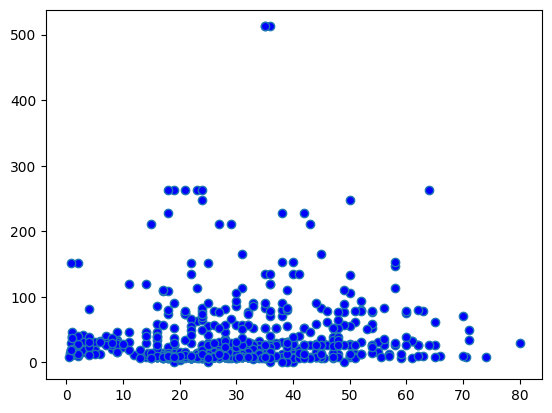

In [23]:
plt.plot(titanic['Age'], titanic['Fare'],linestyle=' ', marker='o', markerfacecolor='blue')


**Question 2 :** afficher un histogramme (barplot) montrant, pour chaque classe (1e, 2e et 3e), le nombre de passagers à bord du bateau. Pensez à nommer vos axes et votre figure. Sur l'abscisse, seules les classes 1, 2 et 3 doivent apparaitre (pas de nombre décimal) : si nécessaire, regarder dans la documention comment utiliser `xticks`.

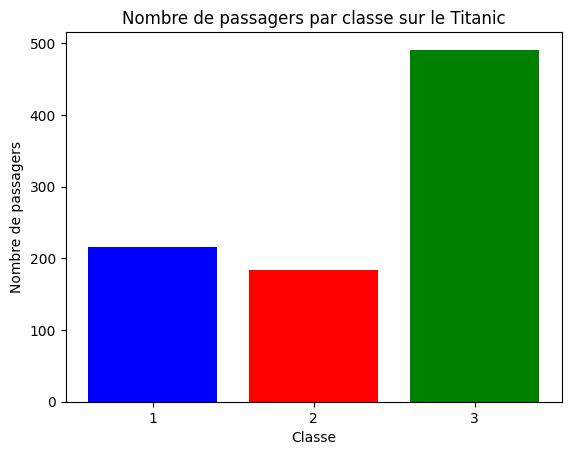

In [12]:
# Compter le nombre de passagers par classe
counts = titanic['Pclass'].value_counts().sort_index()

# Positions des barres (1, 2, 3)
classes = counts.index
nb_passagers = counts.values

# Création du barplot
plt.bar(classes, nb_passagers, color=['blue','red','green'])

# Nommer les axes et la figure
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.title("Nombre de passagers par classe sur le Titanic")

# Forcer les ticks de l'axe des x à être 1, 2, 3 (entiers)
plt.xticks([1, 2, 3])

plt.show()

**Question 3 :** proposez un graphique similaire au précédent, en représentant séparement pour chaque classe le nombre d'hommes et le nombre de femmes, sur deux barres côte à côte. Pensez à nommer vos axes, votre figure, et à afficher une légende expliquant quelle couleur représente les hommes, et laquelle représente les femmes.

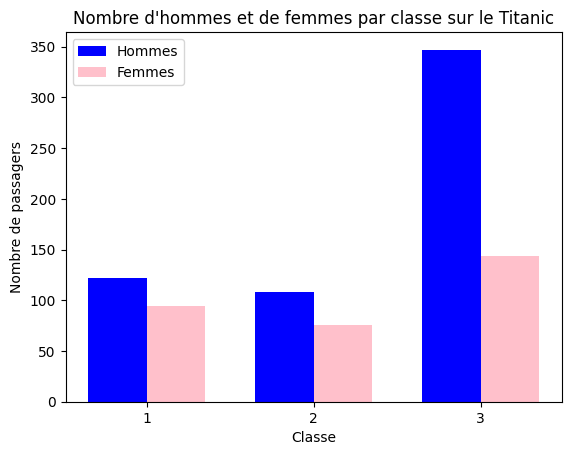

In [13]:
# Compter le nombre d'hommes et de femmes par classe
counts = titanic.groupby(['Pclass', 'Sex']).size().unstack()

# Positions des classes
classes = counts.index
pos = range(len(classes))
width = 0.35  # largeur des barres

# Création du barplot
plt.bar([p - width/2 for p in pos], counts['male'], width, color='blue', label='Hommes')
plt.bar([p + width/2 for p in pos], counts['female'], width, color='pink', label='Femmes')

# Nommer les axes et la figure
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.title("Nombre d'hommes et de femmes par classe sur le Titanic")

# Forcer les ticks de l'axe des x à être 1, 2, 3
plt.xticks(pos, classes)

# Afficher la légende
plt.legend()

plt.show()

**Question 4 :** proposez un scatterplot montrant le nombre total de membres de la famille voyageant avec le passager (calculé à la question 10 de la section sur pandas), en fonction du prix du ticket (sur l'axe y, ordonnée). Colorez chaque point du graphique en fonction de si le passager a survécu ou non. Affichez une légende expliquant ce code couleur, donnez un titre à vos axes, et ajoutez un titre à votre graphique.

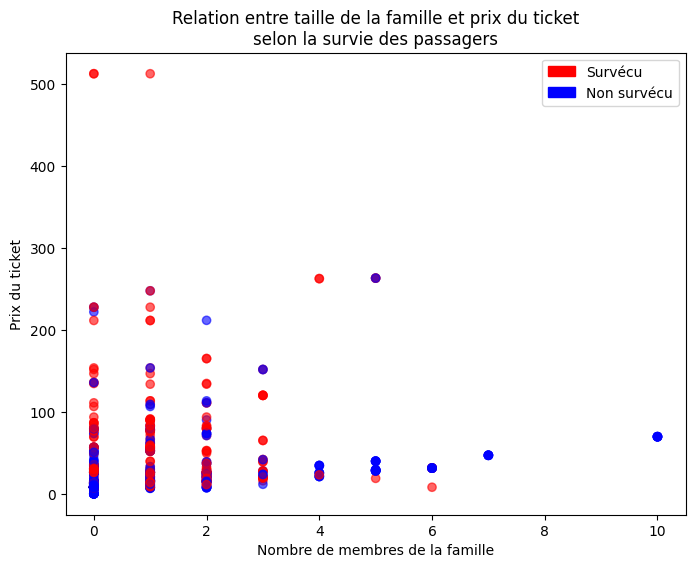

In [25]:
# Calcul du nombre total de membres de la famille (si pas déjà fait)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

# Scatterplot
plt.figure(figsize=(8,6))
plt.scatter(
    titanic['FamilySize'],
    titanic['Fare'],
    c=titanic['Survived'],   # couleur selon survie
    cmap='bwr',              # bleu = non, rouge = oui
    alpha=0.6
)

# Titres et labels
plt.xlabel("Nombre de membres de la famille")
plt.ylabel("Prix du ticket")
plt.title("Relation entre taille de la famille et prix du ticket\nselon la survie des passagers")

# Légende personnalisée
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Survécu')
blue_patch = mpatches.Patch(color='blue', label='Non survécu')
plt.legend(handles=[red_patch, blue_patch])


**Question 5 :** proposez une figure composée de six sous-graphes, répartis sur deux lignes et 3 colonnes. Chaque colonne représente un port d'embarquement. Sur la première, pour chaque port, représentez sur un scatterplot l'âge des passagers (abscisse) en fonction du prix de leur billet (ordonnée). Sur la deuxième ligne, pour chaque port, représentez un barplot représentant le nombre de passagers de chaque genre.

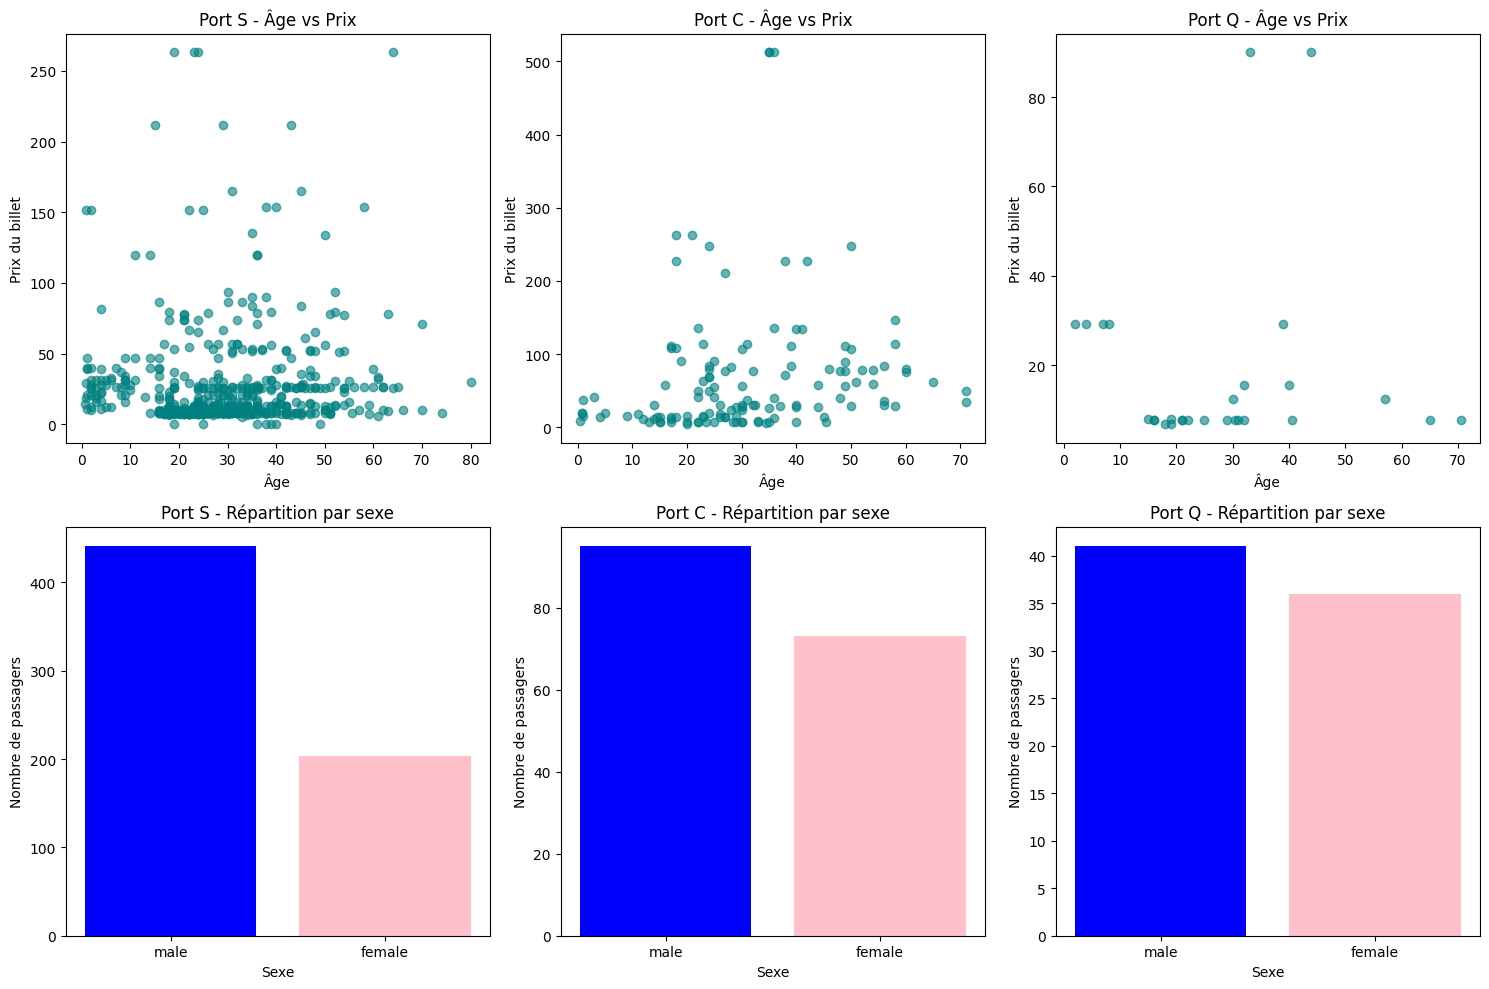

In [24]:

# Ports d'embarquement
ports = titanic['Embarked'].dropna().unique()

# Création de la figure avec 2 lignes et 3 colonnes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, port in enumerate(ports):
    # Filtrer les passagers du port
    data_port = titanic[titanic['Embarked'] == port]

    # --- Ligne 1 : scatterplot Age vs Fare ---
    axes[0, i].scatter(data_port['Age'], data_port['Fare'], alpha=0.6, color='teal')
    axes[0, i].set_title(f"Port {port} - Âge vs Prix")
    axes[0, i].set_xlabel("Âge")
    axes[0, i].set_ylabel("Prix du billet")

    # --- Ligne 2 : barplot Hommes/Femmes ---
    counts = data_port['Sex'].value_counts()
    axes[1, i].bar(counts.index, counts.values, color=['blue','pink'])
    axes[1, i].set_title(f"Port {port} - Répartition par sexe")
    axes[1, i].set_xlabel("Sexe")
    axes[1, i].set_ylabel("Nombre de passagers")

# Ajuster l'espacement
plt.tight_layout()
plt.show()


### Seaborn

Vous allez cette fois générer des visualisations uniquement avec Seaborn. La documentation est accessible à l'adresse suivante : https://seaborn.pydata.org/api.html


**Question 1 :** proposez un scatterplot de l'âge des passagers en fonction du prix de leur ticket. Colorez chaque point en fonction du port dans lequel le passager à embarqué. Affichez une légende, nommez vos axes, et affichez un titre pour votre graphique.

<Axes: xlabel='Age', ylabel='Fare'>

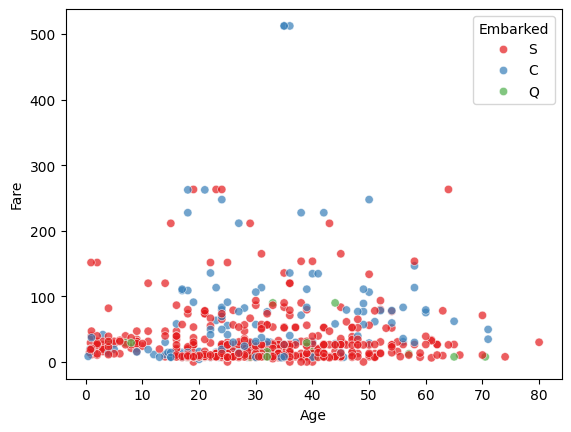

In [27]:
sns.scatterplot(
    data=titanic,
    x="Age",
    y="Fare",
    hue="Embarked",   # couleur selon le port
    palette="Set1",   # palette de couleurs
    alpha=0.7
)

**Question 2 :** faire un barplot représentant le nombre de passagers par genre. Indice : utilisez un `histplot`.

<Axes: xlabel='Sex', ylabel='Count'>

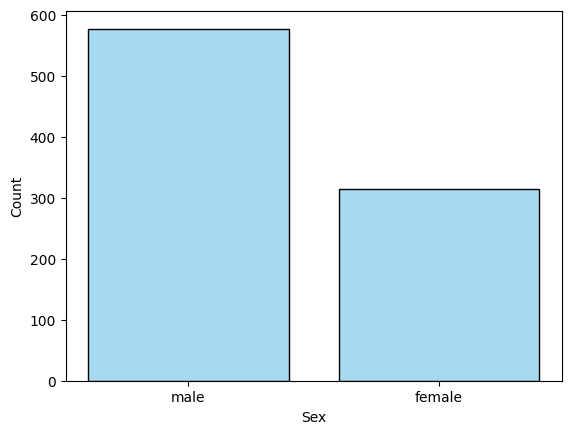

In [28]:
sns.histplot(
    data=titanic,
    x="Sex",          # variable catégorielle
    stat="count",     # on veut des effectifs
    discrete=True,    # évite les décimales sur l'axe x
    shrink=0.8,       # espace entre les barres
    color="skyblue"   # couleur des barres
)

**Question 3 :** reproduire l'histogramme de la question 3 de la partie matplot lib - histogramme du nombre et de femmes pour chaque classe.

<Axes: xlabel='Pclass', ylabel='count'>

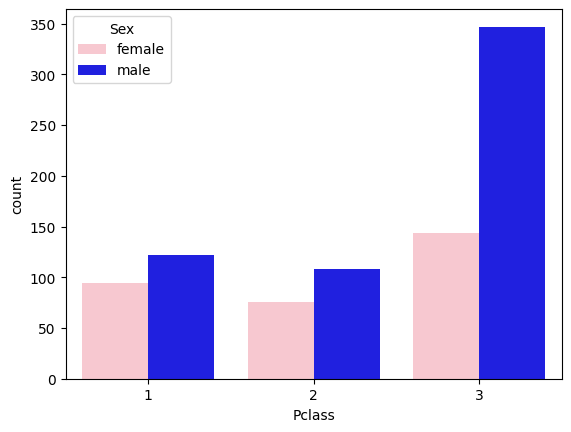

In [29]:
sns.countplot(
    data=titanic,
    x="Pclass",       # classes en abscisse
    hue="Sex",        # couleur selon le sexe
    palette={"male":"blue", "female":"pink"}
)

**Question 4 :** proposer un pairplot pour les colonnes suivantes : Age et Fare. Colorer chaque point en fonction de si le passager a survécu ou non.

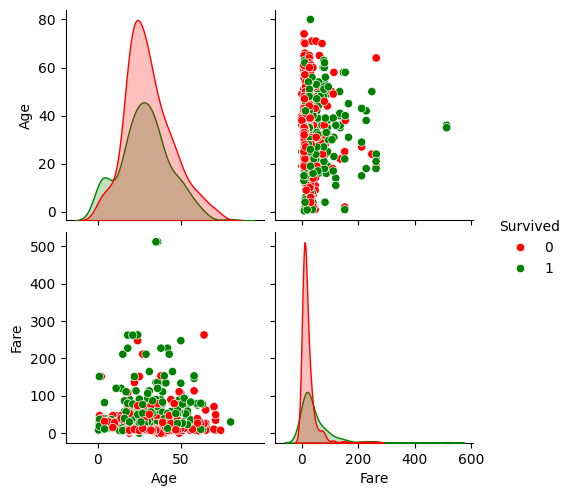

In [30]:
sns.pairplot(
    data=titanic,
    vars=["Age", "Fare"],   # colonnes à comparer
    hue="Survived",         # couleur selon la survie
    palette={0: "red", 1: "green"}  # rouge = non survécu, vert = survécu
)

**Question 5 :** en utilisant la fonction `corr` de pandas, et la fonction `heatmap` de seaborn, proposez une *heatmap* représentant la corrélation entre les attributs suivants : Survived, Age, Pclass, FamilyMembers(calculé par vos soins dans la partie pandas), et Fare.

<Axes: >

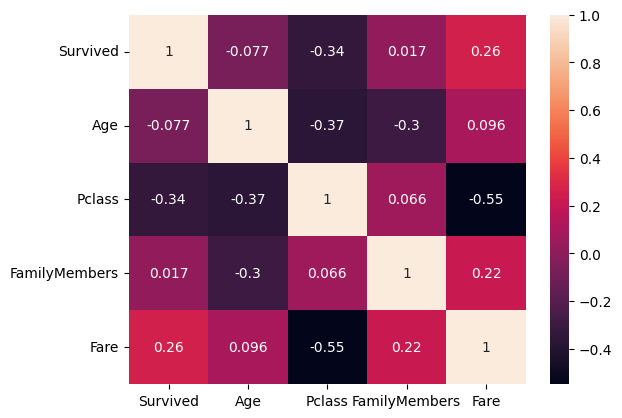

In [37]:
# Calcul du nombre de membres de la famille si pas déjà fait
titanic['FamilyMembers'] = titanic['SibSp'] + titanic['Parch']

# Sélection des colonnes d'intérêt
cols = ['Survived', 'Age', 'Pclass', 'FamilyMembers', 'Fare']

# Calcul de la matrice de corrélation
corr_matrix = titanic[cols].corr()

sns.heatmap(corr_matrix,annot=True)

# Fin du TP !